In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# using read_excel as data is in xlsx format
df_train=pd.read_excel(r"Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Checking for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
#Since null value count is low we will delete it 
df_train.dropna(inplace=True)

In [5]:
df_test=pd.read_excel(r"Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Combining both train and test data so we don't have to do feature engineering on both separately
final_df=df_train.append(df_test)
final_df

C:\Users\hello\AppData\Local\Temp\ipykernel_3712\3355252902.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=df_train.append(df_test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

### HANDLING NUMERICAL DATA 

In [10]:
final_df['Date_of_Journey'].str.split('/').str[2].astype(int)

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2666    2019
2667    2019
2668    2019
2669    2019
2670    2019
Name: Date_of_Journey, Length: 13353, dtype: int32

In [11]:
#Separating Date time and year
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

#Method 2
#final_df[["day", "month", "year"]]=final_df["Date_of_Journey"].str.split("/", expand = True)

#Method 3
#df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
#df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
#df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [12]:
# converting date month and year column to numeric type
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [13]:
final_df.drop('Year',axis=1,inplace=True)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             13353 non-null  int32  
 12  Month            13353 non-null  int32  
dtypes: float64(1), int32(2), object(10)
memory usage: 1.3+ MB


In [15]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3


In [17]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [18]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [19]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,04,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,19,15


In [20]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13353 non-null  object 
 9   Price            10682 non-null  float64
 10  Date             13353 non-null  int32  
 11  Month            13353 non-null  int32  
 12  Arrival_hour     13353 non-null  int32  
 13  Arrival_min      13353 non-null  int32  
dtypes: float64(1), int32(4), object(9)
memory usage: 1.3+ MB


In [22]:
final_df.drop('Arrival_Time',inplace=True,axis=1)

In [23]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,19,15


In [24]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [25]:
final_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,19,15,4,0


In [26]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
dtype: int64

In [27]:
final_df


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,19,15,4,0


In [28]:
final_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [29]:
final_df['Duration_hr'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['Duration_min'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [30]:
# There is faulty data 5m which is representing total duration which is not possible so dropping that row 
final_df['Duration_hr'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [31]:
final_df[final_df['Duration_hr']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327.0,6,3,16,55,16,50,5m,NaN
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,NaN,12,3,16,55,16,50,5m,NaN


In [32]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [33]:
final_df['Duration_min'].isnull().sum()

1283

In [34]:
# Since there are journeys which had duration only in hours so filling minutes columns as 0 for that rows
final_df.Duration_min.fillna(0,inplace=True)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13350 non-null  object 
 5   Total_Stops      13350 non-null  object 
 6   Additional_Info  13350 non-null  object 
 7   Price            10680 non-null  float64
 8   Date             13350 non-null  int32  
 9   Month            13350 non-null  int32  
 10  Arrival_hour     13350 non-null  int32  
 11  Arrival_min      13350 non-null  int32  
 12  Dept_hour        13350 non-null  int32  
 13  Dept_min         13350 non-null  int32  
 14  Duration_hr      13350 non-null  object 
 15  Duration_min     13350 non-null  object 
dtypes: float64(1), int32(6), object(9)
memory usage: 1.4+ MB


In [36]:
final_df['Duration_hr']=final_df['Duration_hr'].astype(int)
final_df['Duration_min']=final_df['Duration_min'].astype(int)

In [37]:
##final_df['Duration_in_mins']=(final_df['Duration_hr']*60)+final_df['Duration_min']

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13350 non-null  object 
 5   Total_Stops      13350 non-null  object 
 6   Additional_Info  13350 non-null  object 
 7   Price            10680 non-null  float64
 8   Date             13350 non-null  int32  
 9   Month            13350 non-null  int32  
 10  Arrival_hour     13350 non-null  int32  
 11  Arrival_min      13350 non-null  int32  
 12  Dept_hour        13350 non-null  int32  
 13  Dept_min         13350 non-null  int32  
 14  Duration_hr      13350 non-null  int32  
 15  Duration_min     13350 non-null  int32  
dtypes: float64(1), int32(8), object(7)
memory usage: 1.3+ MB


In [39]:
final_df.drop(['Duration'],axis=1,inplace=True)
##final_df.drop(['Duration','Duration_hr','Duration_min'],axis=1,inplace=True)

In [40]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
Duration_hr           0
Duration_min          0
dtype: int64

In [41]:
final_df.describe()

,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min
count,10680.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000
mean,9086.049345,13.391161,4.710712,13.396105,24.658801,12.513258,24.501124,10.234007,28.346442
std,4611.111643,8.439823,1.165552,6.896989,16.557798,5.736812,18.831566,8.472669,16.903468
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


# HANDLING CATEGORICAL DATA

1.   **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2.   **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case




In [42]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [43]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

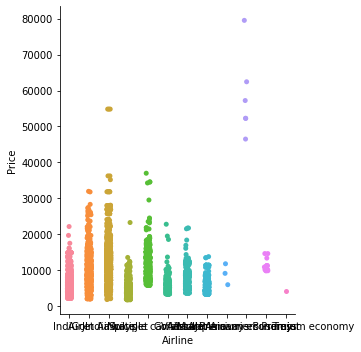

In [44]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = final_df)
plt.show()

In [45]:
Airline = final_df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
Source = final_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [47]:
Destination = final_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
final_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
final_df['Additional_Info'].value_counts()

No info                         10489
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [50]:
# Concatenate dataframe --> final_df + Airline + Source + Destination
final_df = pd.concat([final_df, Airline, Source, Destination], axis = 1)

In [51]:
final_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [52]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
final_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [53]:
final_df

,Total_Stops,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897.0,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662.0,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882.0,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218.0,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302.0,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1 stop,NaN,6,6,20,25,20,30,23,55,...,0,0,0,1,0,0,0,0,0,0
2667,non-stop,NaN,27,3,16,55,14,20,2,35,...,0,0,0,1,0,0,0,0,0,0
2668,1 stop,NaN,6,3,4,25,21,50,6,35,...,0,0,1,0,0,1,0,0,0,0
2669,1 stop,NaN,6,3,19,15,4,0,15,15,...,0,0,1,0,0,1,0,0,0,0


In [54]:
final_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1896
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [55]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [56]:
final_df

,Total_Stops,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,20,25,20,30,23,55,...,0,0,0,1,0,0,0,0,0,0
2667,0,NaN,27,3,16,55,14,20,2,35,...,0,0,0,1,0,0,0,0,0,0
2668,1,NaN,6,3,4,25,21,50,6,35,...,0,0,1,0,0,1,0,0,0,0
2669,1,NaN,6,3,19,15,4,0,15,15,...,0,0,1,0,0,1,0,0,0,0


In [57]:
df_train=final_df[~final_df['Price'].isnull()]
df_train.head()

,Total_Stops,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10680 non-null  int64  
 1   Price                                      10680 non-null  float64
 2   Date                                       10680 non-null  int32  
 3   Month                                      10680 non-null  int32  
 4   Arrival_hour                               10680 non-null  int32  
 5   Arrival_min                                10680 non-null  int32  
 6   Dept_hour                                  10680 non-null  int32  
 7   Dept_min                                   10680 non-null  int32  
 8   Duration_hr                                10680 non-null  int32  
 9   Duration_min                               10680 non-null  int32  
 10  Airline_Air India     

In [59]:
df_test=final_df[final_df['Price'].isnull()]
df_test

,Total_Stops,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,NaN,6,6,4,25,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,NaN,12,5,10,20,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,NaN,21,5,19,0,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,NaN,21,5,21,0,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,NaN,24,6,2,45,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,20,25,20,30,23,55,...,0,0,0,1,0,0,0,0,0,0
2667,0,NaN,27,3,16,55,14,20,2,35,...,0,0,0,1,0,0,0,0,0,0
2668,1,NaN,6,3,4,25,21,50,6,35,...,0,0,1,0,0,1,0,0,0,0
2669,1,NaN,6,3,19,15,4,0,15,15,...,0,0,1,0,0,1,0,0,0,0


In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                2670 non-null   int64  
 1   Price                                      0 non-null      float64
 2   Date                                       2670 non-null   int32  
 3   Month                                      2670 non-null   int32  
 4   Arrival_hour                               2670 non-null   int32  
 5   Arrival_min                                2670 non-null   int32  
 6   Dept_hour                                  2670 non-null   int32  
 7   Dept_min                                   2670 non-null   int32  
 8   Duration_hr                                2670 non-null   int32  
 9   Duration_min                               2670 non-null   int32  
 10  Airline_Air India       

In [61]:
X=df_train.drop('Price',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10680 non-null  int64
 1   Date                                       10680 non-null  int32
 2   Month                                      10680 non-null  int32
 3   Arrival_hour                               10680 non-null  int32
 4   Arrival_min                                10680 non-null  int32
 5   Dept_hour                                  10680 non-null  int32
 6   Dept_min                                   10680 non-null  int32
 7   Duration_hr                                10680 non-null  int32
 8   Duration_min                               10680 non-null  int32
 9   Airline_Air India                          10680 non-null  uint8
 10  Airline_GoAir                              106

In [62]:
y=df_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [63]:
X_test = df_test.drop('Price',axis=1)
X_test

,Total_Stops,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,20,30,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,16,55,14,20,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,4,25,21,50,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,19,15,4,0,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [64]:
y_test = df_test['Price']
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2666   NaN
2667   NaN
2668   NaN
2669   NaN
2670   NaN
Name: Price, Length: 2670, dtype: float64

In [65]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [66]:
print(selection.feature_importances_)

[2.10096810e-01 1.44149997e-01 5.26365311e-02 2.70565614e-02
 1.93891240e-02 2.42680184e-02 2.13101470e-02 1.48029789e-01
 1.78295225e-02 8.73560223e-03 1.90573469e-03 1.89326554e-02
 1.32644344e-01 6.77632390e-02 2.01051812e-02 8.21868695e-04
 3.29097932e-03 1.12302461e-04 4.91954900e-03 7.31171472e-05
 5.35094653e-04 8.19770877e-03 3.17377391e-03 5.11684390e-03
 1.27567353e-02 1.48357326e-02 5.95866065e-03 5.54736099e-04
 2.47996411e-02]


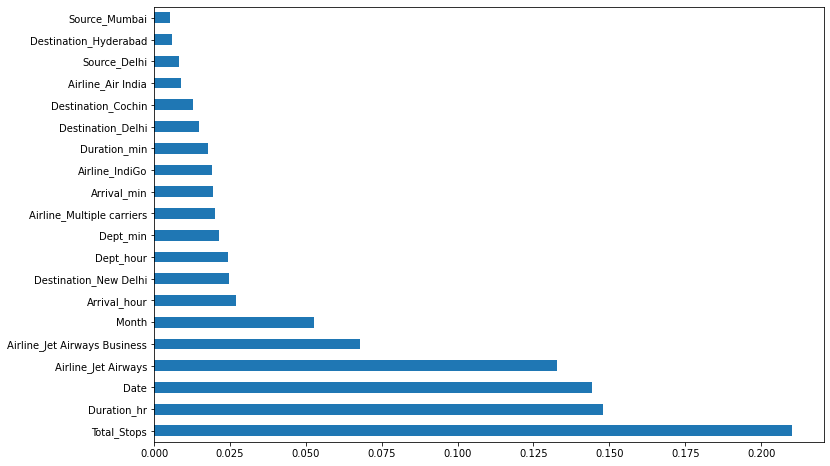

In [67]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# TRAINING MODEL

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [69]:
#train_test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state= 40)


In [70]:
print("The size of training input is", X.shape)
print("The size of training output is", y.shape)
print(50 *'-')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (10680, 29)
The size of training output is (10680,)
--------------------------------------------------
The size of testing input is (3204, 29)
The size of testing output is (3204,)


In [71]:
# XGB Regressor
tuned_params = {'max_depth': [5], 'learning_rate': [0.1], 'n_estimators': [400], 'reg_lambda': [0.1]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

C:\Users\hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': [5], 'n_estimators': [400],
                                        'reg_lambda': [0.1]},
                   scoring='neg_mean_absolute_error')

In [72]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [73]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1211.0881104478729
R-squared:  0.9300045873093197


In [74]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2034.4241882030242
R-squared:  0.8116409897859758


In [75]:
from scipy.stats import zscore 
df_train.apply(zscore)

,Total_Stops,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220572,-1.125389,1.237119,-1.467531,-1.800266,-0.889857,1.654057,-0.234771,-0.970694,1.278916,...,-0.016762,-0.192338,-0.859068,-0.606344,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,3.234073
1,1.742090,-0.308844,-1.475325,0.250272,-0.050887,-0.586912,-1.303036,1.363799,-0.381987,-0.196629,...,-0.016762,-0.192338,-0.859068,1.649230,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,-0.309208
2,1.742090,1.040134,-0.531866,1.109173,-1.362921,0.018977,-0.607250,0.031657,1.030910,-1.672174,...,-0.016762,-0.192338,1.164052,-0.606344,-0.264029,1.164052,-0.366552,-0.264029,-0.192338,-0.309208
3,0.260759,-0.622016,-0.178069,0.250272,1.406929,0.321921,0.958270,-1.034057,-0.617470,-0.196629,...,-0.016762,-0.192338,-0.859068,1.649230,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,-0.309208
4,0.260759,0.914345,-1.475325,-1.467531,1.115365,0.624866,0.610377,1.363799,-0.735211,0.983807,...,-0.016762,-0.192338,-0.859068,-0.606344,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,3.234073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.220572,-1.079844,-0.531866,-0.608630,1.261147,0.018977,1.132217,1.630228,-0.970694,0.098480,...,-0.016762,-0.192338,-0.859068,1.649230,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,-0.309208
10679,-1.220572,-1.071603,1.590916,-0.608630,1.406929,-0.283968,1.306163,1.097371,-0.970694,0.393589,...,-0.016762,-0.192338,-0.859068,1.649230,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,-0.309208
10680,-1.220572,-0.402752,1.590916,-0.608630,-0.342450,-0.283968,-0.781196,-0.234771,-0.852953,-1.672174,...,-0.016762,-0.192338,-0.859068,-0.606344,-0.264029,-0.859068,2.728129,-0.264029,-0.192338,-0.309208
10681,-1.220572,0.772507,-1.475325,-1.467531,0.094895,-0.889857,-0.259356,0.298086,-0.970694,0.688698,...,-0.016762,-0.192338,-0.859068,-0.606344,-0.264029,-0.859068,-0.366552,-0.264029,-0.192338,3.234073


C:\Users\hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


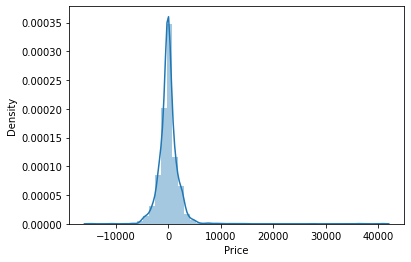

In [76]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 1192.8897054722247
MSE: 4138881.777545534
RMSE: 2034.4241882030242


In [79]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [80]:
metrics.r2_score(y_test, y_test_pred)

0.8116409897859758

In [81]:
#import pickle
# open a file, where you ant to store the data
#pickle.dump(model, open('model.pkl','wb'))

In [82]:
#depickling
#model = pickle.load(open('model.pkl','rb'))

In [83]:
#y_train_pred = model.predict(X_train)
#y_test_pred = model.predict(X_test)

In [84]:
#metrics.r2_score(y_test, y_test_pred)

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
import pickle
# open a file, where you ant to store the data
filename = 'reg_rf'
pickle.dump(reg_rf, open(filename, 'wb'))


In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)